We are working with data on the average life expectancy at birth and the average BMI for males across the world. The data comes from Gapminder.

The data file can be found under the "bmi_and_life_expectancy.csv" tab in the quiz below. It includes three columns, containing the following data:

    Country – The country the person was born in.
    Life expectancy – The average life expectancy at birth for a person in that country.
    BMI – The mean BMI of males in that country.

In [1]:
#import modules
import pandas as pd
#For your linear regression model, you'll be using scikit-learn's LinearRegression class
from sklearn.linear_model import LinearRegression

## Load the data

In [2]:
bmi_life_data = pd.read_csv('bmi_and_life_expectancy.csv')
bmi_life_data

,Country,Life expectancy,BMI
0,Afghanistan,52.8,20.62058
1,Albania,76.8,26.44657
2,Algeria,75.5,24.59620
3,Andorra,84.6,27.63048
4,Angola,56.7,22.25083
...,...,...,...
158,Vanuatu,63.4,26.78926
159,West Bank and Gaza,74.1,26.57750
160,Vietnam,74.1,20.91630
161,Zambia,51.1,20.68321


In [3]:
bmi_life_data.shape #163 rows and 3 cols

(163, 3)

## Build a linear regression model
```
model = LinearRegression()
model.fit(2D_array_of_x_values, 2D_array_of_y_values)
```

In [16]:
#Create a regression model using scikit-learn's LinearRegression
bmi_life_model = LinearRegression()

#Fit the model to the data.Fitting the model means finding the best line that fits the training data.
bmi_life_model.fit(bmi_life_data[['BMI']], bmi_life_data[['Life expectancy']])

#bmi_life_model.fit(bmi_life_data['BMI'], bmi_life_data['Life expectancy']) --------------> ERROR: Expected 2D array, got 1D array instead


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predict using the model
```
model.predict(2D_array_of_x_values)
```

In [5]:
laos_life_exp = bmi_life_model.predict([[21.07931],[25],[26]])
# laos_life_exp = bmi_life_model.predict([21.07931]) ----- ERROR:Expected 2D array, got 1D array instead

In [6]:
laos_life_exp

array([[60.31564716],
       [70.18982432],
       [72.70830375]])

In [7]:
#co-efficients of model w1,w2
bmi_life_model.coef_

array([[2.51847944]])

In [8]:
#intercept of model
bmi_life_model.intercept_

array([7.22783834])

# USING MY MODEL

In [9]:
x = bmi_life_data['BMI']
y = bmi_life_data['Life expectancy']

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def error_list(w_1,w_2):
    #y_pred = w_1 * x + w_2
    y_pred = []
    for i in range(0,len(x)):
        y_pred.append((w_1*x[i])+w_2)
    # error = y - y_pred
    error = []
    for j in range(0,len(x)):
        error.append(y[j] - y_pred[j])
    return error

In [17]:
from sklearn import metrics

def fit_and_plot(x,y,iterate,learning_rate):
    global w_1
    global w_2
    w_1 = 0
    w_2 = 0
    plt.plot(x,y,'o', color='black')
    for i in range(0,iterate): # i am moving line 50times , you can change it
        errors = error_list(w_1,w_2)  # as w1 and w2 are changing it means that line is also moving so we have to calculate new q-q' w.r.t to new line
        # add (q-q') * x * learning rate in w1
        w_1 += np.matmul(errors,x) * learning_rate  #t=x #matmul ---> multiply array element by element and then add it
        
        # add q-q' * learning_rate in w2
        w_2 += sum(errors)* learning_rate
        print("mean squared_error", sum([i**2 for i in errors])/(2*len(errors))) 
    print(w_1,w_2)
    y_pred = []
    for i in range (0,len(y)):
         y_pred.append((w_1 * x[i]) + w_2)
    plt.plot(x,y_pred) 
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
    print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred)) 


    

mean squared_error 2466.830834662577
mean squared_error 22.166781526625897
mean squared_error 21.74960453027233
mean squared_error 21.74952599748884
mean squared_error 21.74951864069069
mean squared_error 21.749511296264018
mean squared_error 21.749503952065112
mean squared_error 21.749496608091892
mean squared_error 21.749489264344355
mean squared_error 21.749481920822465
mean squared_error 21.74947457752624
mean squared_error 21.749467234455686
mean squared_error 21.749459891610766
mean squared_error 21.749452548991503
mean squared_error 21.749445206597855
mean squared_error 21.74943786442984
mean squared_error 21.749430522487447
mean squared_error 21.749423180770673
mean squared_error 21.749415839279518
mean squared_error 21.74940849801394
mean squared_error 21.749401156973953
mean squared_error 21.74939381615957
mean squared_error 21.749386475570763
mean squared_error 21.749379135207512
mean squared_error 21.749371795069845
mean squared_error 21.749364455157725
mean squared_error 2

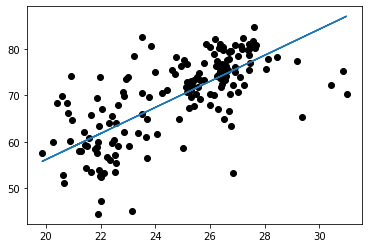

In [18]:
fit_and_plot(x,y,100,0.00001) #x = 1D array , y = 1D array

In [19]:
def predict(x):
    #y = w1*x + w2
    y = []
    for x_value in x:
        y.append(w_1* x_value + w_2)
    return y

In [20]:
predict([21.07931,25,26]) #x = 1D array

[59.1946241318237, 70.18179017286404, 72.9841453810137]

### xxxxxxxxxxxxxxxxx  Match predictions of both models  xxxxxxxxxxxxxxxx